In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sample Dataset
X = np.array([[1, 2], [2, 3], [3, 1], [4, 2], [2, 4], [3, 3]])
y = np.array ([0, 0, 0, 1, 1, 1])

# Perceptron learning law
class Perceptron:
    def __init__(self, lr=0.1, epochs=100):
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for epochs in range(self.epochs):
            for xi, yi in zip(X, y):
                # Calculate prediction
                prediction = self.predict(xi)

                # Update weights and bias
                delta = self.lr * (yi - prediction)
                self.weights += delta * xi
                self.bias += delta
    
    def predict(self, X):
        activation = np.dot(X, self.weights) + self.bias
        # Apply step functiom
        return np.where(activation >= 0, 1, 0)

In [6]:
# Train perceptron
perceptron = Perceptron(lr=0.1, epochs=100)
perceptron.fit(X,y)

In [10]:
# Decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

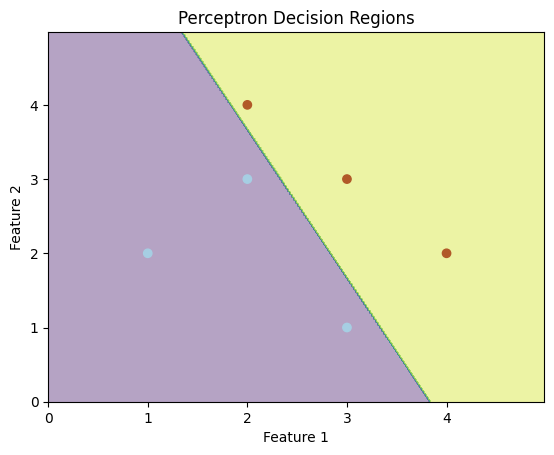

In [12]:
# Plot results
plt.contourf(xx, yy, Z, alpha = 0.4)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Regions')
plt.show()